# Import Libraries

In [7]:
import seaborn as sns
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
sns.set_style('whitegrid')

# Read in Dataset

Dataset can be found here https://www.kaggle.com/snap/amazon-fine-food-reviews

In [15]:
amazon = pd.read_csv('Reviews.csv')

In [3]:
amazon.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


568,454 rows of data are easily handled by the DataFrame object

In [7]:
amazon['Summary'].nunique()

295743

In [44]:
amazon.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


# Add 'text length' column

In [16]:
amazon['text length']=amazon['Text'].apply(len)

# Histogram of text length as a function of score

Making charts for different variants is accomplished in a few lines of code.

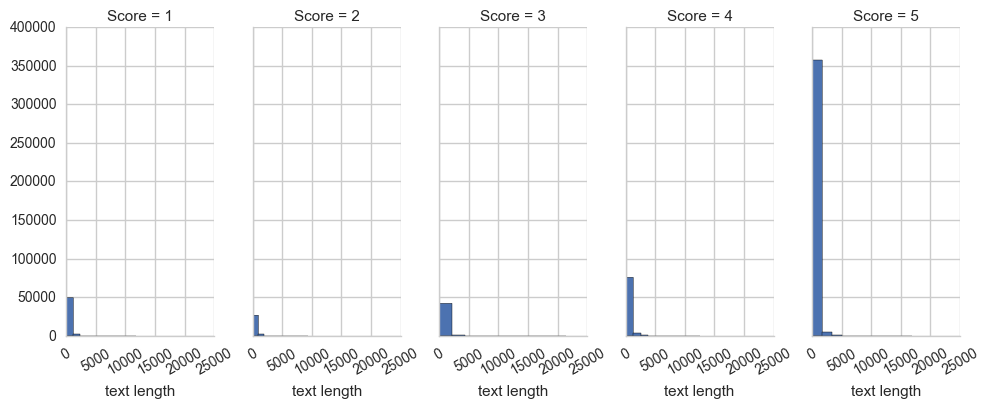

In [17]:
g = sns.FacetGrid(amazon, col='Score',size=4, aspect=.5)
g.map(plt.hist, 'text length')
g.set_xticklabels(rotation=30)

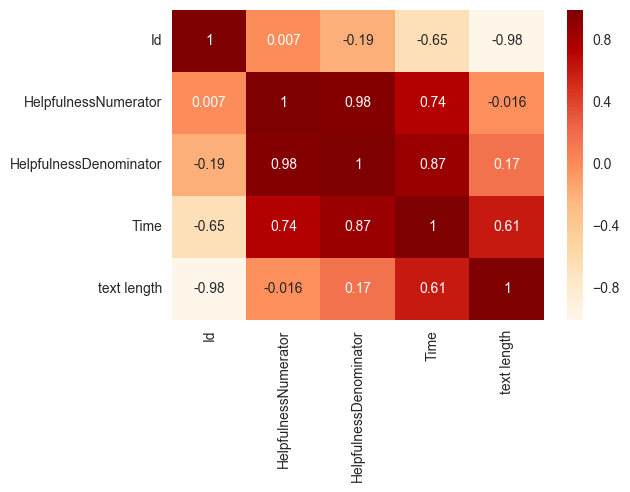

In [48]:
sns.heatmap(amazon.groupby('Score').mean().corr(), annot=True,cmap='OrRd')

# Split Amazon reviews into 1 star and 5 star reviews

In [49]:
amazon_class = amazon[(amazon['Score'] == 1) | (amazon['Score'] == 5)]

## Check to make sure scores only consist of 1 and 5 star reviews

In [50]:
amazon_class['Score'].unique()

array([5, 1])

# Split into X feature and y label

In [51]:
X = amazon_class['Text']
y = amazon_class['Score']

# Split dataset into training and test set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Build data pipelines

1. First we will use count vectorizer to tokenize the words found in each text review
2. Then we will use a naive Bayes classifier to classify the reviews as either 1 or 5 stars
3. Next, we will use a Bernoulli classifier to classify the reviews as either 1 or 5 stars
4. Finally, we will use a Logistic Regression classifier

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on tokens w/ Naive Bayes classifier Multinomial
])

pipeline2 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('classifier', BernoulliNB()),  # train on tokens w/ Naive Bayes classifier Bernoulli
])

pipeline3 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('classifier', LogisticRegression()),  # train on tokens w/ Logistic Regression classifier 
])

# Fit the pipelines to the training set

In [54]:
pipeline.fit(X_train,y_train)
pipeline2.fit(X_train,y_train)
pipeline3.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

# Use the fitted pipelines to classify our test set as either 1 or 5 star

In [55]:
pred = pipeline.predict(X_test)
pred2 = pipeline2.predict(X_test)
pred3 = pipeline3.predict(X_test)

# Multinomial Naive Bayes Model Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,pred))
print()
print()
print(classification_report(y_test,pred))

[[ 12079   3559]
 [  3949 105030]]


             precision    recall  f1-score   support

          1       0.75      0.77      0.76     15638
          5       0.97      0.96      0.97    108979

avg / total       0.94      0.94      0.94    124617



# Bernoulli Naive Bayes Model Evaluation

In [57]:
print(confusion_matrix(y_test,pred2))
print()
print()
print(classification_report(y_test,pred2))

[[  9689   5949]
 [  6109 102870]]


             precision    recall  f1-score   support

          1       0.61      0.62      0.62     15638
          5       0.95      0.94      0.94    108979

avg / total       0.90      0.90      0.90    124617



# Logistic Regression Model Evaluation

In [58]:
print(confusion_matrix(y_test,pred3))
print()
print()
print(classification_report(y_test,pred3))

[[ 12853   2785]
 [  1640 107339]]


             precision    recall  f1-score   support

          1       0.89      0.82      0.85     15638
          5       0.97      0.98      0.98    108979

avg / total       0.96      0.96      0.96    124617



# Success! (Sort of)

Out of the three classifiers logistic regression performed the best with regards to precision / recall.

Now that we have classified 1 and 5 star scores, let's address the elephant in the room; the Amazon Food Reviews dataset is extremely biased towards 5 star reviews, as depicted in the countplot below:

# Countplot # of Ratings

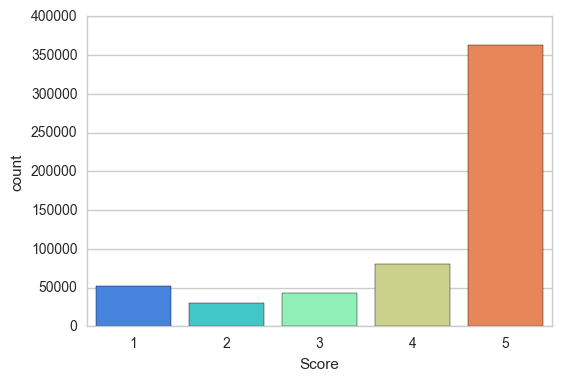

In [59]:
sns.countplot(x='Score',data=amazon,palette='rainbow')

Because of this existing bias towards 5 star reviews, it makes more sense to 'abstract' the scores into two classes:

1. Positive reviews
2. Negative reviews

# Partition into positive and negative reviews

Using a score of 3 as the cutoff point, lets split the data into 'positive' reviews (>= 3 stars) and 'negative' reviews (< 3 stars). This method was inspired by Guillaume Payen's model that can be found at https://www.kaggle.com/gpayen/building-a-prediction-model

In [60]:
def partition(x):
    if x < 3:
        return 'Negative'
    return 'Positive'

amazon['Sentiment'] = amazon['Score'].map(partition)

# Split into X feature and y label

In [61]:
X = amazon['Text']
y = amazon['Sentiment']

# Split into training / test set

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit the pipelines to the training set

In [63]:
pipeline.fit(X_train,y_train)
pipeline2.fit(X_train,y_train)
pipeline3.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

# Use the fitted pipelines to classify our test set as either positive / negative

In [64]:
pred = pipeline.predict(X_test)
pred2 = pipeline2.predict(X_test)
pred3 = pipeline3.predict(X_test)

# Multinomial Naive Bayes Model Evaluation

In [65]:
print(confusion_matrix(y_test,pred))
print()
print()
print(classification_report(y_test,pred))

[[ 17116   7598]
 [  9428 136395]]


             precision    recall  f1-score   support

   Negative       0.64      0.69      0.67     24714
   Positive       0.95      0.94      0.94    145823

avg / total       0.90      0.90      0.90    170537



# Bernoulli Naive Bayes Model Evaluation

In [66]:
print(confusion_matrix(y_test,pred2))
print()
print()
print(classification_report(y_test,pred2))

[[ 14197  10517]
 [ 11337 134486]]


             precision    recall  f1-score   support

   Negative       0.56      0.57      0.57     24714
   Positive       0.93      0.92      0.92    145823

avg / total       0.87      0.87      0.87    170537



# Logistic Regression Model Evaluation

In [67]:
print(confusion_matrix(y_test,pred3))
print()
print()
print(classification_report(y_test,pred3))

[[ 16677   8037]
 [  3889 141934]]


             precision    recall  f1-score   support

   Negative       0.81      0.67      0.74     24714
   Positive       0.95      0.97      0.96    145823

avg / total       0.93      0.93      0.93    170537



# Success Pt 2! 

Our negative/positive classification algorithm performs well compared to the 1 or 5 star score classification. It should be noted that the Negative / Positive outcomes are not as precisely (or accurately) predicted as the 1 or 5 star reviews, but this makes sense as we are trying to predict more classes of scores with Negative / Positive than either 1 or 5.